In [58]:
import glob
import os

In [4]:
import json

# Replace 'your_file.json' with the path to your file
with open('rules/train_rules.json', 'r') as f:
    data = json.load(f)

# Now `data` is a Python list (if the JSON is an array at the top level)
print(data)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [71]:
data[10]

{'program_complexity': 31,
 'original_depth': 4,
 'original_complexity': 37,
 'exprs': ['((α → (α ∧ β)) ∧ (α ∨ (α ∧ γ))) ∨ ((γ → γ) ∧ (α ∨ β) ∧ (α ∨ γ ∨ (α ∧ γ)))',
  '((α → (α ∧ β)) ∧ (α ∨ (α ∧ γ))) ∨ ((α ∨ β) ∧ (α ∨ γ ∨ (α ∧ γ)))',
  '((α ∨ β) ∧ (α ∨ γ)) ∨ ((α ∨ (α ∧ γ)) ∧ (β ∨ ¬α))',
  'α ∨ (β ∧ γ) ∨ ((α ∨ (α ∧ γ)) ∧ (β ∨ ¬α))',
  'α ∨ (α ∧ (β ∨ ¬α)) ∨ (β ∧ γ)',
  'α ∨ (α ∧ β) ∨ (β ∧ γ)',
  'α ∨ (β ∧ γ)'],
 'complexity_by_step': [25, 22, 18, 15, 11, 8, 5],
 'elimination_complexity': [8, 3, 1, 4, 4, 1],
 'num_var': [3, 3, 3, 3, 3, 3, 3],
 'num_ops': [3, 3, 3, 3, 3, 2, 2],
 'rule': '(((α → (α ∧ β)) ∧ (α ∨ (α ∧ γ))) ∨ ((γ → γ) ∧ (α ∨ β) ∧ (α ∨ γ ∨ (α ∧ γ)))) ⇔ (((α → (α ∧ β)) ∧ (α ∨ (α ∧ γ))) ∨ ((α ∨ β) ∧ (α ∨ γ ∨ (α ∧ γ)))) ⇔ (((α ∨ β) ∧ (α ∨ γ)) ∨ ((α ∨ (α ∧ γ)) ∧ (β ∨ ¬α))) ⇔ (α ∨ (β ∧ γ) ∨ ((α ∨ (α ∧ γ)) ∧ (β ∨ ¬α))) ⇔ (α ∨ (α ∧ (β ∨ ¬α)) ∨ (β ∧ γ)) ⇔ (α ∨ (α ∧ β) ∨ (β ∧ γ)) ⇔ (α ∨ (β ∧ γ))',
 'id': 'train_1527592'}

In [73]:
max_vars = 0
for x in data:
    max_vars = max(max(x["num_var"]), max_vars)

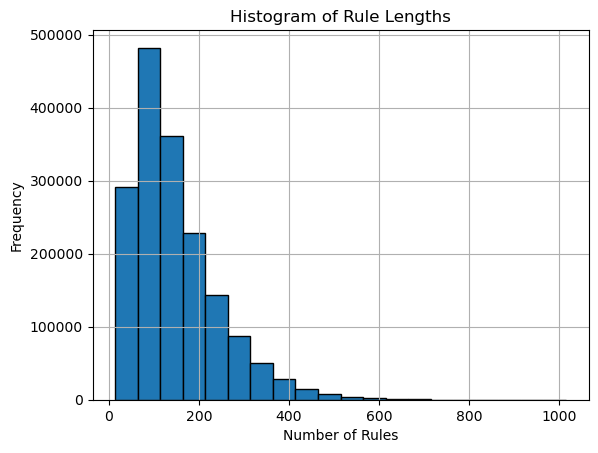

In [51]:
import matplotlib.pyplot as plt

# Assuming you already have this:
lengths = [len(z['rule']) for z in data]

# Plot histogram
plt.hist(lengths, bins=20, edgecolor='black')
plt.xlabel('Number of Rules')
plt.ylabel('Frequency')
plt.title('Histogram of Rule Lengths')
plt.grid(True)
plt.show()

     

In [52]:
sum(lengths)

250903721

In [7]:
x = data[0]

In [47]:
y = data[200001]

In [48]:
y['rule']

'((((α ∧ γ) ∨ ¬δ) → ¬(α ∧ β)) ∨ ¬β ↛ (β → γ)) ⇔ ((((α ∧ γ) ∨ ¬δ) → ¬(α ∧ β)) ∨ ¬β ↛ (γ ∨ ¬β)) ⇔ ((δ ∧ ¬γ) ∨ ¬α ∨ ¬β ∨ ¬β ↛ (γ ∨ ¬β)) ⇔ ((δ ∧ ¬γ) ∨ ¬α ∨ ¬β)'

In [42]:
len(y['rule'])

578

In [9]:
x['rule']

'(((α ∨ β ∨ (α ∧ β)) → (α ∨ (β → β))) ∨ ¬¬¬β) ⇔ (((α ∨ β ∨ (α ∧ β)) → (True)) ∨ ¬¬¬β) ⇔ (True)'

In [10]:
import re

def replace_greek_with_functions(expr, function_names):
    greek_letters = ['α', 'β', 'γ', 'δ']
    
    if len(function_names) > len(greek_letters):
        raise ValueError("Too many function names provided — max is 4 (α to δ).")

    # Create mapping from Greek letter to provided function name
    greek_map = dict(zip(greek_letters, function_names))

    # Replace each Greek letter in the string
    for greek, func in greek_map.items():
        expr = re.sub(rf'\b{re.escape(greek)}\b', func, expr)

    return expr


In [11]:
x['rule']

'(((α ∨ β ∨ (α ∧ β)) → (α ∨ (β → β))) ∨ ¬¬¬β) ⇔ (((α ∨ β ∨ (α ∧ β)) → (True)) ∨ ¬¬¬β) ⇔ (True)'

In [14]:
replaced_x = replace_greek_with_functions(x['rule'], ["Love(x)", "Hate(x)", "","",""])

In [43]:
replaced_y = replace_greek_with_functions(y['rule'], ["Love(x)", "Hate(x)", "Jealous(x)","",""])

In [24]:
import tiktoken

def tokenize_with_cl100k_base(text):
    """
    Tokenize a string using the cl100k_base tokenizer.

    Parameters:
    - text (str): The input string to tokenize.

    Returns:
    - tokens (list of int): The token IDs.
    - decoded (list of str): The decoded text chunks for each token.
    """
    enc = tiktoken.get_encoding("cl100k_base")
    tokens = enc.encode(text)
    return tokens, len(tokens)


In [26]:
tokens, l = tokenize_with_cl100k_base(replaced_x)

In [27]:
l

83

In [23]:
replaced_x

'(((Love(x) ∨ Hate(x) ∨ (Love(x) ∧ Hate(x))) → (Love(x) ∨ (Hate(x) → Hate(x)))) ∨ ¬¬¬Hate(x)) ⇔ (((Love(x) ∨ Hate(x) ∨ (Love(x) ∧ Hate(x))) → (True)) ∨ ¬¬¬Hate(x)) ⇔ (True)'

In [44]:
replaced_y

'((((Hate(x) → Love(x)) ∨ (Jealous(x) → Love(x))) → ((Love(x) → Jealous(x)) ∧ (Hate(x) → Love(x)))) → ((Love(x) → Jealous(x)) ∧ ((Love(x) → Jealous(x)) → ¬Love(x)) ∧ ¬Love(x))) ⇔ ((((Hate(x) → Love(x)) ∨ (Jealous(x) → Love(x))) → ((Love(x) → Jealous(x)) ∧ (Hate(x) → Love(x)))) → (((Love(x) → Jealous(x)) → ¬Love(x)) ∧ ¬Love(x) ∧ (Jealous(x) ∨ ¬Love(x)))) ⇔ ((((Hate(x) → Love(x)) ∨ (Jealous(x) → Love(x))) → ((Love(x) → Jealous(x)) ∧ (Hate(x) → Love(x)))) → (((Jealous(x) ∨ ¬Love(x)) → ¬Love(x)) ∧ ¬Love(x) ∧ (Jealous(x) ∨ ¬Love(x)))) ⇔ (((Love(x) ∨ (Jealous(x) → Love(x)) ∨ ¬Hate(x)) → ((Love(x) → Jealous(x)) ∧ (Hate(x) → Love(x)))) → (((Jealous(x) ∨ ¬Love(x)) → ¬Love(x)) ∧ ¬Love(x) ∧ (Jealous(x) ∨ ¬Love(x)))) ⇔ (((Love(x) ∨ ¬Hate(x) ∨ ¬Jealous(x)) → ((Love(x) → Jealous(x)) ∧ (Hate(x) → Love(x)))) → (((Jealous(x) ∨ ¬Love(x)) → ¬Love(x)) ∧ ¬Love(x) ∧ (Jealous(x) ∨ ¬Love(x)))) ⇔ (((Love(x) ∨ ¬Hate(x) ∨ ¬Jealous(x)) → ((Hate(x) → Love(x)) ∧ (Jealous(x) ∨ ¬Love(x)))) → (((Jealous(x) ∨ ¬Love(x))

In [45]:
tokens, l = tokenize_with_cl100k_base(replaced_y)

In [46]:
l

540

In [53]:
def process_file(input_file, output_file):
    # Read the input file
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Remove extra spaces at the end of each line and remove duplicates
    cleaned_lines = set(line.rstrip() for line in lines if line.strip())  # Remove empty lines after stripping

    # Write the processed lines to the output file
    with open(output_file, 'w') as file:
        for line in cleaned_lines:
            file.write(line + '\n')

    # Return the unique cleaned lines
    return list(cleaned_lines)


In [55]:
# Example usage:
input_filename = 'rules/basic_predicates.txt'
output_filename = 'rules/predicates/basic_predicates.txt'
unique_lines = process_file(input_filename, output_filename)
len(unique_lines)

In [89]:
def process_all_files(input_directory, output_directory):
    total_unique_lines = set()  # Set to track unique lines across all files
    total_count = 0
    
    # Get all .txt files from the input directory
    input_files = glob.glob(os.path.join(input_directory, '*.txt'))

    # Process each file
    for input_file in input_files:
        # Generate output filename based on the input filename
        filename = os.path.basename(input_file)
        output_file = os.path.join(output_directory, filename)

        # Process the file and get unique lines
        unique_lines = process_file(input_file, output_file)

        # Update the total unique lines set (adding unique lines across all files)
        total_unique_lines.update(unique_lines)

        # Print the unique line count for each file
        print(f"Processed {filename}: {len(unique_lines)} unique lines.")
        total_count += len(unique_lines)

    # Total unique lines across all files
    print(f"\nTotal unique lines across all files: {len(total_unique_lines)}")
    print(f"Total lines processed: {total_count}")

    return len(total_unique_lines), total_count
    
# Example usage:
input_directory = 'rules'
output_directory = 'rules/predicates'

process_all_files(input_directory, output_directory)


Processed pet_triplet_predicates.txt: 1039 unique lines.
Processed emotion_predicates.txt: 262 unique lines.
Processed bridgerton_triplet_predicates.txt: 876 unique lines.
Processed basic_predicates.txt: 666 unique lines.
Processed family_predicates.txt: 623 unique lines.
Processed harrypotter_triplet_predicates.txt: 881 unique lines.
Processed routines_predicates.txt: 577 unique lines.
Processed position_predicates.txt: 861 unique lines.
Processed science_predicates.txt: 893 unique lines.

Total unique lines across all files: 6337
Total lines processed: 6678


(6337, 6678)

In [90]:
def read_file_lines(filepath):
    """
    Reads a file line by line and returns a list of stripped lines.

    :param filepath: Path to the file.
    :return: List of lines with leading/trailing whitespace removed.
    """
    lines = []
    with open(filepath, 'r') as file:
        for line in file:
            lines.append(line.strip())
    return lines

In [96]:
basics = read_file_lines("rules/predicates/basic_predicates.txt")
routines = read_file_lines("rules/predicates/routines_predicates.txt")

In [161]:
import random
random.sample(basics, 4)

['Tells(x)', 'Carves(x)', 'Stands(x)', 'Affects(x)']

In [162]:
random.sample(routines, 4)

['Slide(x)', 'MakeCall(x)', 'Knock(x)', 'PrioritizeTask(x)']

In [189]:
rule = data[0]['rule']

In [210]:
import os
import re

def separate_predicates(input_string):
    return re.findall(r'\b\w+\s*\([^)]*\)', input_string)

directory = 'rules/predicates'  # Replace with the actual directory path

# List all files and directories in the given directory

triplets = {}
singles = {}
fundamentals = ["Is(x)", "Feels(x)", "Exists(x)", "Does(x)", "Stands(x)", "There(x)", "Are(x)", "Do(x)",\
                "Has(x)", "Have(x)", "Comes(x)", "Come(x)", "Goes(x)", "Gone(x)", "Moves(x)", "Becomes(x)", \
                "Happens(x)", "Changes(x)", "Lives(x)", "Alive(x)","Hard(x)", "Soft(x)",\
                "Remains(x)", "Remembers(x)", "Looks(x)", "Sounds(x)", "Belongs(x)", "Matters(x)", "Begins(x)", "Works(x)"]

for filename in os.listdir(directory):
    pth = os.path.join(directory, filename)
    k = filename.split("_")[0]
    v = read_file_lines(pth)
    if "triplet" in filename:
        triplets[k] = [separate_predicates(x) for x in v if x and (("True" not in x) or ("False" not in x))]
    else:
        singles[k] = [x for x in v if x and (("True" not in x) or ("False" not in x))]
i = 0

def generate_data(rule_datum):
    generated = []
    global i

    for _, datalist in triplets.items():
        predicates = random.sample(datalist,1)[0]
        predicates += random.sample(fundamentals,1)
        
        datum = replace_greek_with_functions(rule_datum['rule'], predicates)
        tokens, length = tokenize_with_cl100k_base(datum)
        data = {"id" : i, "rule_id" : rule_datum["id"], "datum" : datum, "tokens": tokens, "length" : length}
        generated.append(data)

        #print("\n"+replace_greek_with_functions(rule_datum['rule'], predicates))
        #print(tokens, length)
        i += 1
        
    
    for _, datalist in singles.items():
        predicates = random.sample(datalist,4)
        
        datum = replace_greek_with_functions(rule_datum['rule'], predicates)
        tokens, length = tokenize_with_cl100k_base(datum)
        data = {"id" : i, "rule_id" : rule_datum["id"], "datum" : datum, "tokens": tokens, "length" : length}
        generated.append(data)
        #print("\n"+replace_greek_with_functions(rule_datum['rule'], predicates))
        #print(tokens, length)
        i += 1
    return generated
        
    

(((α ∨ β ∨ (α ∧ β)) → (α ∨ (β → β))) ∨ ¬¬¬β) ⇔ (((α ∨ β ∨ (α ∧ β)) → (True)) ∨ ¬¬¬β) ⇔ (True) 93


In [212]:
len(generate_data(data[0]))

9

In [160]:
triplets['pet'][3] + random.sample(fundamentals,1)

['Hen(x)', 'Peck(x)', 'Corn(x)', 'Has(x)']